In [1]:
import numpy as np
import pandas as pd 

### Fashion mnist dataset
* 6만개 학습용 데이터, 1만개 테스트용 데이터(grayscale image array)

In [2]:
from tensorflow.keras.datasets import fashion_mnist, mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 28x28의 grayscale 2차원 데이터
print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

4422102/4422102 [==============================] - 0s 0us/step
train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


Text(0.5, 1.0, '9')

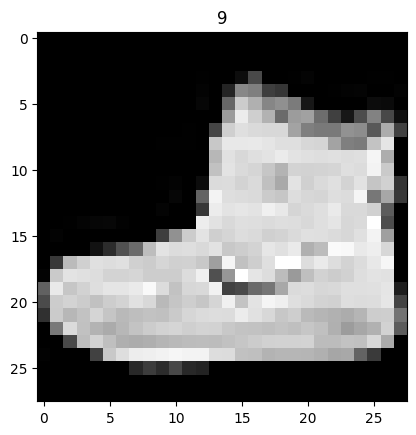

In [3]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap='gray')
plt.title(train_labels[0])

In [4]:
train_images[0, :, :], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

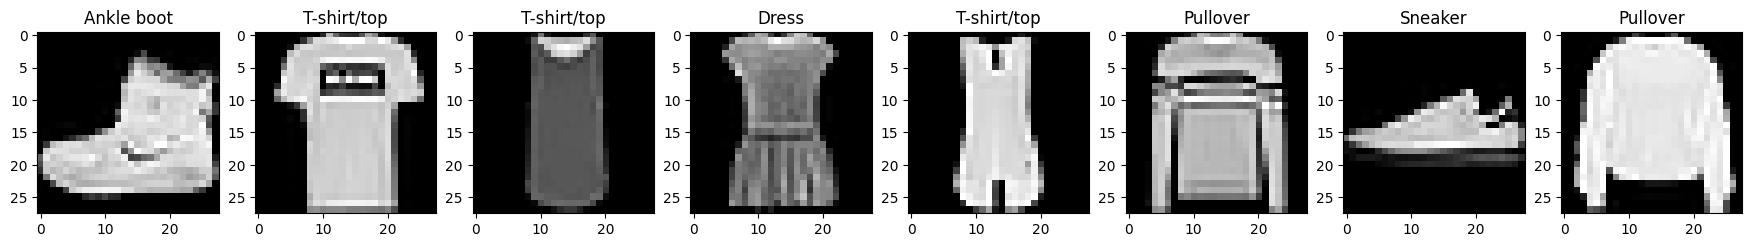

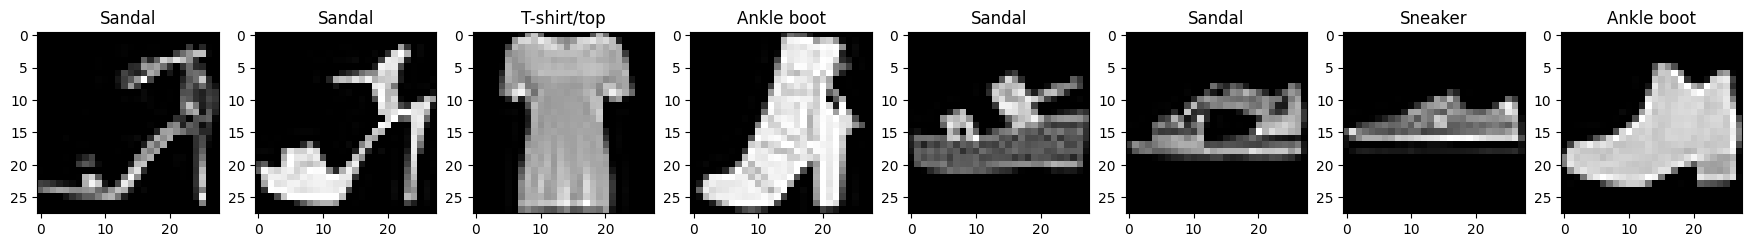

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', \
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i], cmap='gray')
        axs[i].set_title(class_names[labels[i]])
        
show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

#### Dense Layer를 기반으로 모델을 생성

<img src="./data/a.jpg">

In [6]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


#### 모델 학습

In [7]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
from tensorflow.keras.utils import to_categorical

train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

print(train_oh_labels.shape, test_oh_labels.shape)

(60000, 10) (10000, 10)


In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
# vervose = 0 : 수행 내용 출력 안함, 1 : 자세히 출력함, 2 : 축약된 정보 출력함
history = model.fit(x=train_images, y=train_oh_labels, batch_size=32, epochs=20, verbose=1) 

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.8425 - accuracy: 0.6840
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7379 - accuracy: 0.7535
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6027 - accuracy: 0.7865
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5318 - accuracy: 0.8141
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4978 - accuracy: 0.8293
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4561 - accuracy: 0.8448
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4367 - accuracy: 0.8519
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4187 - accuracy: 0.8571
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4017 - accuracy: 0.8605
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.396

In [11]:
history.history

{'loss': [1.842542290687561,
  0.7378894090652466,
  0.6027224659919739,
  0.5318456292152405,
  0.49775949120521545,
  0.45606282353401184,
  0.43669721484184265,
  0.4186702072620392,
  0.4016905128955841,
  0.3965134024620056,
  0.38108983635902405,
  0.36392900347709656,
  0.36513450741767883,
  0.3549059331417084,
  0.3511771559715271,
  0.34539154171943665,
  0.34190988540649414,
  0.33531486988067627,
  0.3321957290172577,
  0.3334580063819885],
 'accuracy': [0.6839666962623596,
  0.7534999847412109,
  0.786549985408783,
  0.8140666484832764,
  0.8292833566665649,
  0.8447999954223633,
  0.8519333600997925,
  0.8571000099182129,
  0.8604833483695984,
  0.8633666634559631,
  0.8673999905586243,
  0.8725500106811523,
  0.8736666440963745,
  0.876550018787384,
  0.8765666484832764,
  0.8781999945640564,
  0.879800021648407,
  0.8828666806221008,
  0.8844166398048401,
  0.8830333352088928]}

In [12]:
print(history.history['loss'])
print(history.history['accuracy'])

[1.842542290687561, 0.7378894090652466, 0.6027224659919739, 0.5318456292152405, 0.49775949120521545, 0.45606282353401184, 0.43669721484184265, 0.4186702072620392, 0.4016905128955841, 0.3965134024620056, 0.38108983635902405, 0.36392900347709656, 0.36513450741767883, 0.3549059331417084, 0.3511771559715271, 0.34539154171943665, 0.34190988540649414, 0.33531486988067627, 0.3321957290172577, 0.3334580063819885]
[0.6839666962623596, 0.7534999847412109, 0.786549985408783, 0.8140666484832764, 0.8292833566665649, 0.8447999954223633, 0.8519333600997925, 0.8571000099182129, 0.8604833483695984, 0.8633666634559631, 0.8673999905586243, 0.8725500106811523, 0.8736666440963745, 0.876550018787384, 0.8765666484832764, 0.8781999945640564, 0.879800021648407, 0.8828666806221008, 0.8844166398048401, 0.8830333352088928]


#### 예측

In [13]:
test_images.shape

(10000, 28, 28)

In [14]:
# image 10000개 
pred_proba = model.predict(test_images)
print(pred_proba.shape)

313/313 [==============================] - 0s 767us/step
(10000, 10)


In [15]:
pred_proba[0]

array([9.5264354e-19, 6.6042380e-25, 1.4808651e-22, 2.0122609e-23,
       3.7121195e-28, 4.4765007e-02, 4.0717424e-21, 1.7871387e-01,
       2.7654478e-06, 7.7651834e-01], dtype=float32)

In [16]:
pred_proba[0].sum()

1.0

In [17]:
pred_proba[0].argmax()

9

In [18]:
# image 1개
# predict 입력값으로 2차원을 넣으면 오류가 날 수가 있음, 3차원으로 만들어 주는것이 좋음
pred_proba = model.predict(test_images[0])

1/1 [==============================] - 0s 44ms/step


In [19]:
test_images[0].shape

(28, 28)

In [20]:
np.expand_dims(test_images[0], axis=0).shape

(1, 28, 28)

In [21]:
pred_proba = model.predict(np.expand_dims(test_images[0], axis=0))
print('softmax output:', pred_proba)

1/1 [==============================] - 0s 16ms/step
softmax output: [[9.5264354e-19 6.6042380e-25 1.4808651e-22 2.0122609e-23 3.7121195e-28
  4.4765007e-02 4.0717424e-21 1.7871387e-01 2.7654478e-06 7.7651834e-01]]


In [22]:
np.squeeze(pred_proba)

array([9.5264354e-19, 6.6042380e-25, 1.4808651e-22, 2.0122609e-23,
       3.7121195e-28, 4.4765007e-02, 4.0717424e-21, 1.7871387e-01,
       2.7654478e-06, 7.7651834e-01], dtype=float32)

In [23]:
pred_proba[0]

array([9.5264354e-19, 6.6042380e-25, 1.4808651e-22, 2.0122609e-23,
       3.7121195e-28, 4.4765007e-02, 4.0717424e-21, 1.7871387e-01,
       2.7654478e-06, 7.7651834e-01], dtype=float32)

In [24]:
len(pred_proba[0])

10

In [25]:
model.evaluate(test_images, test_oh_labels, batch_size=64)

157/157 [==============================] - 0s 1ms/step - loss: 0.4445 - accuracy: 0.8627


[0.4445205628871918, 0.8626999855041504]

#### 검증 데이터 세트를 이용한 학습 수행

In [26]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [27]:
def get_preprocessed_data(images, labels):
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    return images, labels

In [28]:
train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [29]:
train_images[30]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [30]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
tr_images, val_images, tr_labels, val_labels = train_test_split(train_images, train_labels, \
                                                                test_size=0.15, random_state=2021)
print('train과 validation shape:', tr_images.shape, tr_labels.shape, val_images.shape, \
                              val_labels.shape)
tr_oh_labels = to_categorical(tr_labels)
val_oh_labels = to_categorical(val_labels)
print('after OHE:', tr_oh_labels.shape, val_oh_labels.shape)

train과 validation shape: (51000, 28, 28) (51000,) (9000, 28, 28) (9000,)
after OHE: (51000, 10) (9000, 10)


In [31]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
INPUT_SIZE = 28
model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, \
                validation_data=(val_images, val_oh_labels), epochs=20, verbose=1)

Epoch 1/20
399/399 [==============================] - 1s 2ms/step - loss: 0.6083 - accuracy: 0.7921 - val_loss: 0.4593 - val_accuracy: 0.8372
Epoch 2/20
399/399 [==============================] - 1s 2ms/step - loss: 0.4153 - accuracy: 0.8542 - val_loss: 0.4008 - val_accuracy: 0.8550
Epoch 3/20
399/399 [==============================] - 1s 2ms/step - loss: 0.3706 - accuracy: 0.8692 - val_loss: 0.3758 - val_accuracy: 0.8620
Epoch 4/20
399/399 [==============================] - 1s 2ms/step - loss: 0.3445 - accuracy: 0.8759 - val_loss: 0.3757 - val_accuracy: 0.8622
Epoch 5/20
399/399 [==============================] - 1s 2ms/step - loss: 0.3290 - accuracy: 0.8813 - val_loss: 0.3675 - val_accuracy: 0.8653
Epoch 6/20
399/399 [==============================] - 1s 2ms/step - loss: 0.3140 - accuracy: 0.8871 - val_loss: 0.3642 - val_accuracy: 0.8667
Epoch 7/20
399/399 [==============================] - 1s 2ms/step - loss: 0.3003 - accuracy: 0.8904 - val_loss: 0.3367 - val_accuracy: 0.8783
Epoch 

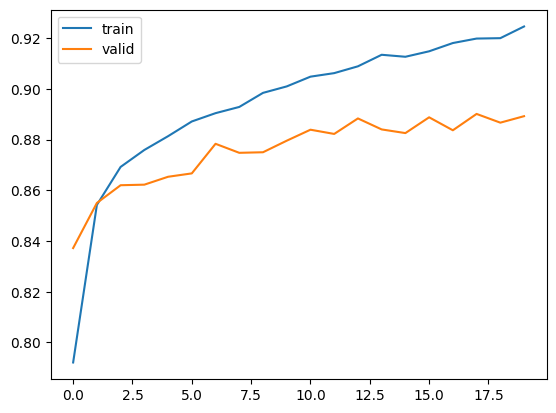

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
show_history(history)

In [34]:
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

40/40 [==============================] - 0s 1ms/step - loss: 0.3418 - accuracy: 0.8826


[0.34184545278549194, 0.8826000094413757]